In [1]:
import argparse
import json
import os

from dipy.align.reslice import reslice
import nibabel as nib
import numpy as np
import pandas as pd
from scipy.ndimage.filters import gaussian_filter
import SimpleITK as sitk

from matplotlib import pyplot as plt

In [6]:
input_directory = "../../data/IBSR_nifti_stripped/"
subject = "IBSR_01"
input_label_suffix = "_segTRI_ana.nii.gz"

input_file = input_directory + subject + '/' + subject + input_label_suffix

zooms = [1., 1., 1.]
n_classes = 4


(256, 256, 256)


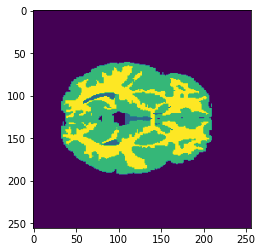

In [12]:
img = nib.load(input_file)
data = img.get_fdata()
affine = img.affine
zoom = img.header.get_zooms()[:3]
data, affine = reslice(data, affine, zoom, zooms, 0)
data = np.squeeze(data)
data = np.pad(data, [((256 - len_) // 2, (256 - len_) // 2) for len_ in data.shape], "constant")

data = np.int32(data)
assert np.max(data) < n_classes
img = nib.Nifti1Image(data, affine)

print(img.shape)
plt.imshow(img.get_fdata()[:,:,130])